In [1]:
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import numpy as np
from sklearn import datasets

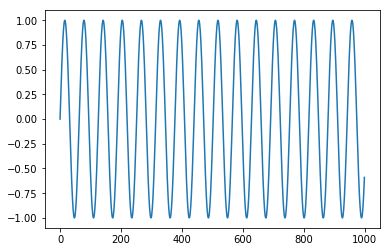

In [2]:
N = 1000
series = np.sin(0.1*np.arange(N))


plt.plot(series)

In [3]:
T = 10
X = []
Y = []


for i in range(len(series) - T):
    
    x = series[i:i+T]
    y = series[i+T]
    
    X.append(x)
    Y.append(y)

In [4]:
X = np.array(X).reshape(-1,T)
Y = np.array(Y).reshape(-1,1)

In [5]:
N = len(X)
print(N)

990


In [8]:
model = nn.Linear(T,1)

J = nn.MSELoss()
optimizer = t.optim.Adam(model.parameters(), lr = 0.1)

In [9]:
X_train = t.from_numpy(X[:-N//2].astype(np.float32))
X_test = t.from_numpy(X[-N//2:].astype(np.float32))

Y_train = t.from_numpy(Y[:-N//2].astype(np.float32))
Y_test = t.from_numpy(Y[-N//2:].astype(np.float32))

In [10]:
epochs = 1000

train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)

In [12]:
for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    output_train = model(X_train)
    
    loss_train = J(output_train, Y_train)
    
    train_losses[epoch] = loss_train.item()
    
    loss_train.backward()
    
    
    optimizer.step()
    ############################################
    
    output_test = model(X_test)
    
    loss_test = J(output_test, Y_test)
    
    test_losses[epoch] = loss_test.item()

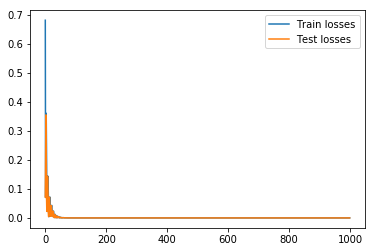

In [18]:
plt.plot(train_losses, label = 'Train losses')
plt.plot(test_losses, label = 'Test losses')
plt.legend()
plt.show()